In [1]:
import matplotlib.pyplot as plt
import numpy as np

from synthacc import space3
from synthacc.earth.flat import Path, azimuth, plot_paths

from data import rauw_fault_surface_trace

In [2]:
trace = rauw_fault_surface_trace(proj=3812)

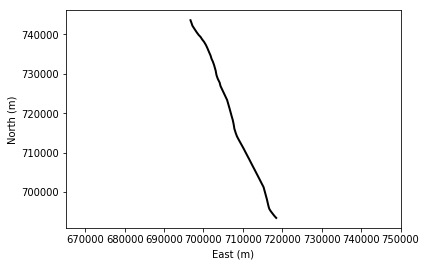

108


In [3]:
trace.plot()
print(len(trace))

In [4]:
print(trace.length)

55180.99137310802


In [5]:
s_trace = trace.get_simplified(n=10)
print(len(s_trace))
print(s_trace.length)

11
55113.49894482133


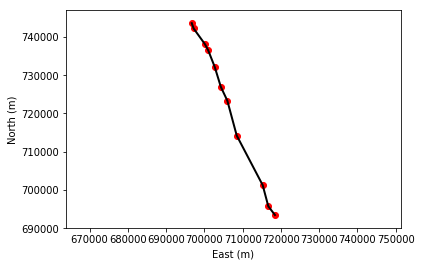

In [6]:
s_trace.plot(points=True)

In [7]:
selection = []
for i in range(len(s_trace)-2):
    i += 1
    p = s_trace[i]
    az1 = azimuth(*p, *s_trace[i-1])
    az2 = azimuth(*p, *s_trace[i+1])
    a = abs(180 - (az2 - az1))

    if a >= 10:
        print(a)
        selection.append(p)

22.413027811365282
12.72938178793197
12.561218051467279
10.203410583086281
16.387491985317297


largest angle is 22.5 (between points that are far enough from each other). This is at end. Interior max is 12.5. See Biasi & Wesnousky (2016, 2017). Conslusion: no barriers. (stepover in Cretaceous)

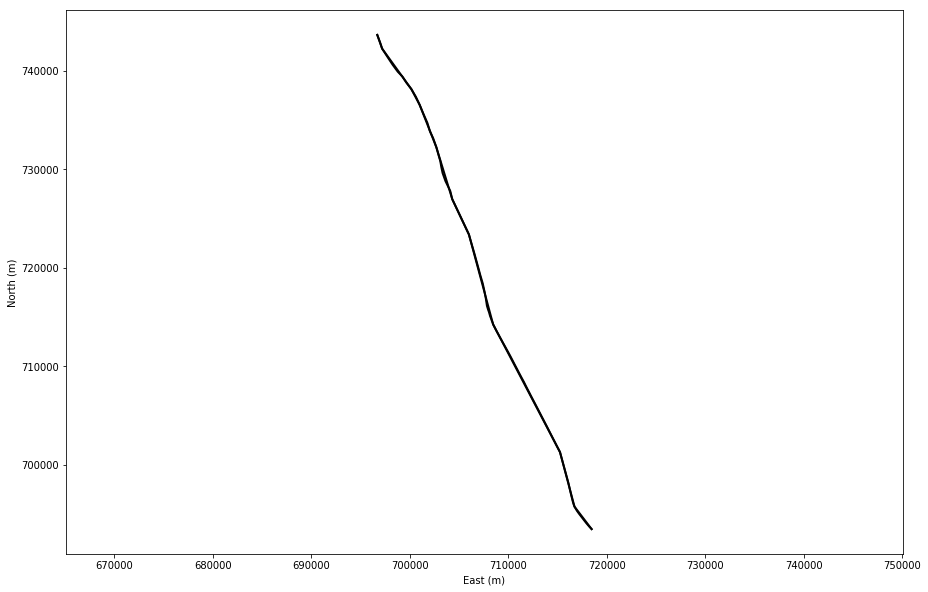

In [8]:
plot_paths([trace, s_trace], size=(15, 10))

Trace of 10 pieces is very close to real trace.

54660.63127124351


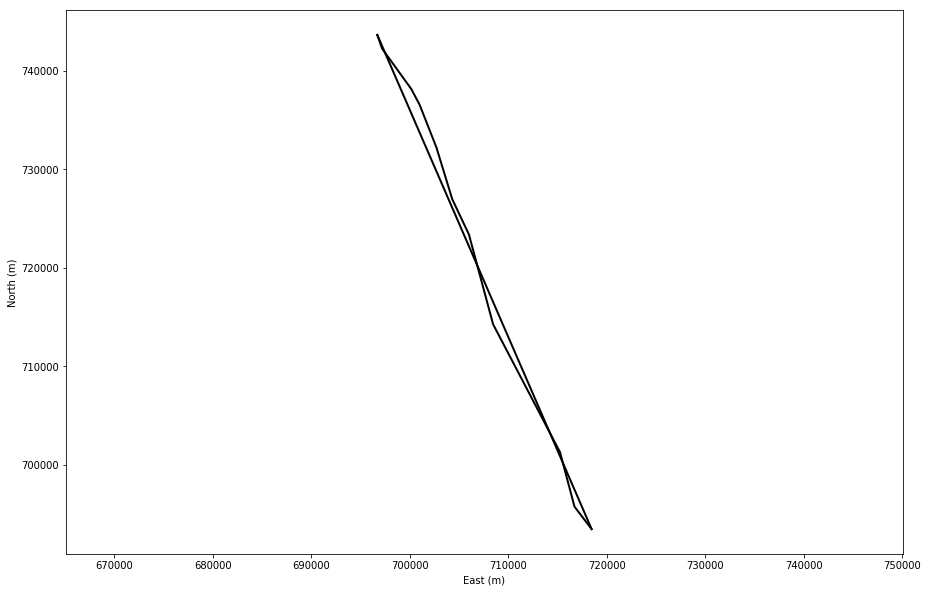

In [9]:
o_trace = trace.get_simplified(n=1)
print(o_trace.length)

plot_paths([s_trace, o_trace], size=(15, 10))

In [10]:
n = 100
#l = o_trace.length / n
ps = space3.Point(*o_trace[0])
pe = space3.Point(*o_trace[1])
v = pe.vector - ps.vector
u = v / n

xs, ys = [], []
for i in range(n+1):
    p = ps.translate(u * i)
    xs.append(p.x)
    ys.append(p.y)

d_o_trace = Path(xs, ys)

In [11]:
max_distance = 0
for p in s_trace:
    min_distance = space3.distance(p[0], p[1], 0, d_o_trace.xs, d_o_trace.ys, 0).min()
    if min_distance > max_distance:
        max_distance = min_distance
        point = p

print(max_distance)
print(max_distance * np.sin(np.radians(60)))

1121.4838127109472
971.2334717407098


With angle of 60 a 10 piece trace gives a max deviation of 975 m.

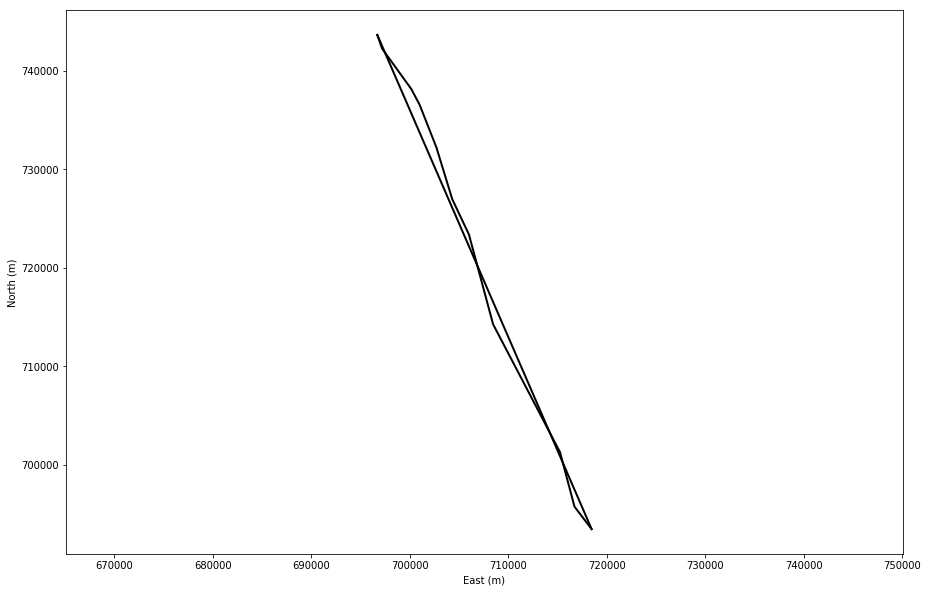

In [12]:
plot_paths([s_trace, o_trace], size=(15, 10))

In [13]:
d = 100

n_trace = trace.get_simplified(n=4)
print(len(n_trace), n_trace.length)

xs = []
ys = []
for i in range(len(n_trace)-1):
    ps = space3.Point(*n_trace[i+0])
    pe = space3.Point(*n_trace[i+1])
    v = pe.vector - ps.vector
    n = int(v.magnitude / d)
    u = v / n
    for i in range(n+1):
        p = ps.translate(u * i)
        xs.append(p.x)
        ys.append(p.y)

d_n_trace = Path(xs, ys)

4 54841.78649239878


In [14]:
max_distance = 0
for p in s_trace:
    min_distance = space3.distance(p[0], p[1], 0, d_n_trace.xs, d_n_trace.ys, 0).min()
    if min_distance > max_distance:
        max_distance = min_distance
        point = p

print(max_distance)
print(max_distance * np.sin(np.radians(60)))

577.5349640230376
500.1599504176823


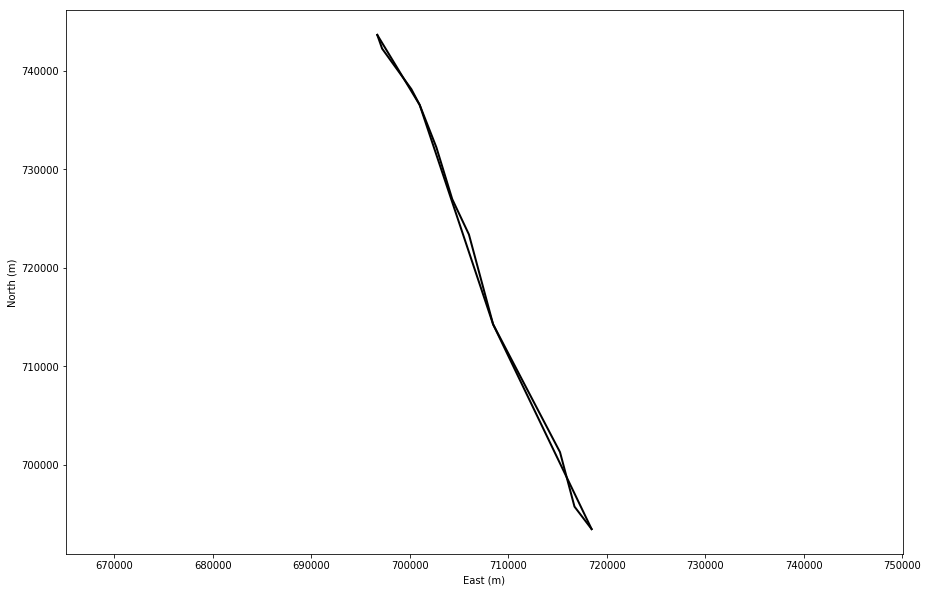

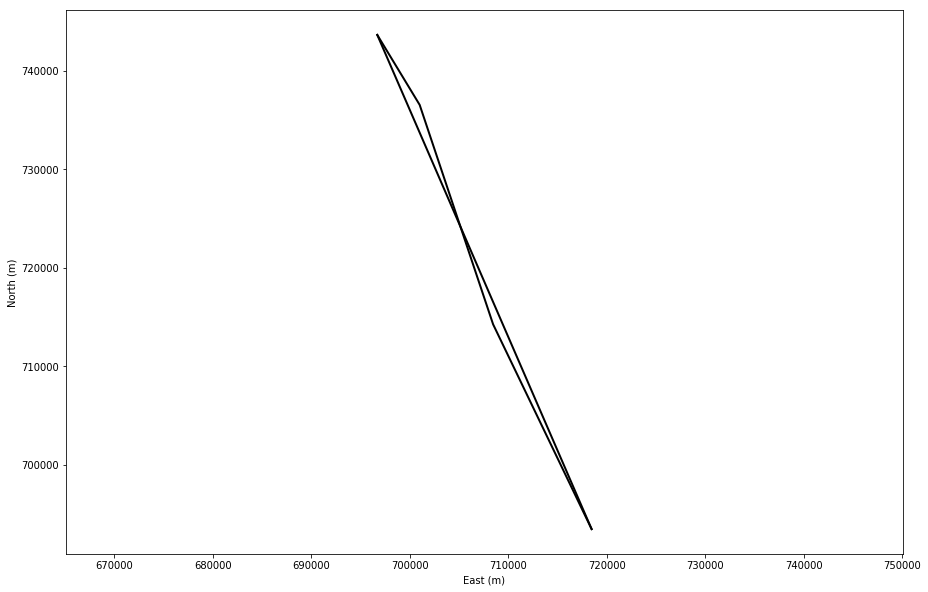

In [15]:
plot_paths([s_trace, n_trace], size=(15, 10))
plot_paths([o_trace, n_trace], size=(15, 10))

A four piece trace gives a max deviation of 500 m (with angle 60).

Conclusions:
- One rectangular plane is good as first approximation (later a 4 piece trace can be used which can be attributed to roughness)
- Dip of 60
- Max depth: 25 km
- Rake is scenario: -80

54660.63127124351 54841.78649239878


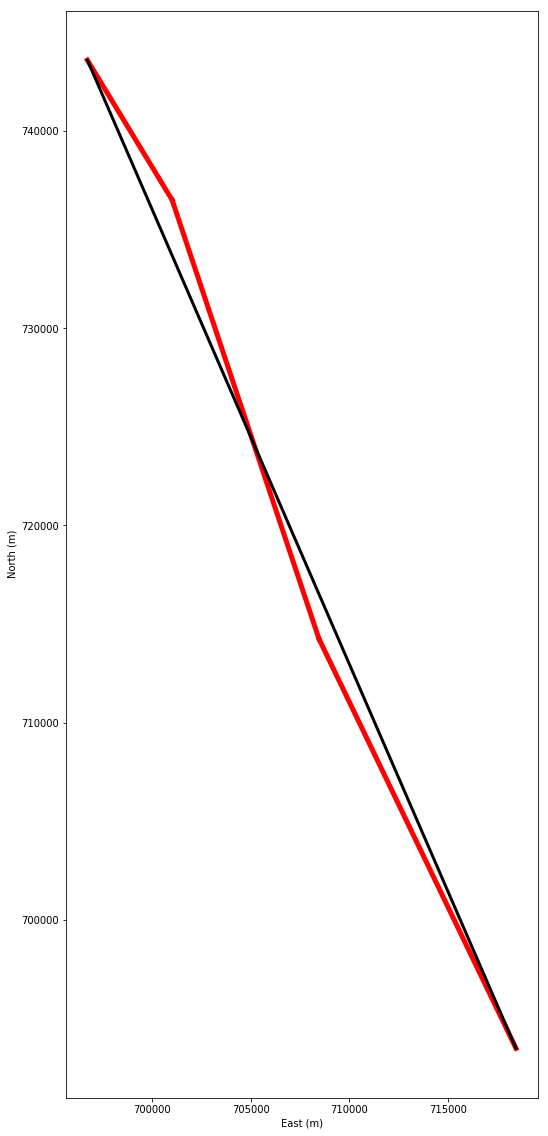

In [16]:
from synthacc.source.faults import FaultGeometryCalculator, plot_faults


trace = rauw_fault_surface_trace(proj=3812)

f1 = FaultGeometryCalculator(n=1, mrd=25, dip=60, usd=0, lsd=20)({'trace': trace})
f2 = FaultGeometryCalculator(n=4, mrd=25, dip=60, usd=0, lsd=20)({'trace': trace})

print(f1.length, f2.length)

plot_faults([f2, f1], colors=['r', 'k'], widths=[5, 3], size=(20, 20))